<a href="https://colab.research.google.com/github/Vaibhav-sa30/Natural-Language-Processing-using-only-Sklearn-Library/blob/main/MLP_New_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
!pip install squarify

In [89]:
!pip install contractions

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import contractions
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

#Load and Learn more about train, movie, and test dataset

In [5]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
movies = pd.read_csv('/content/movies.csv')

##Explore Train

In [6]:
train.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE


In [7]:
train.shape

(162758, 5)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movieid             162758 non-null  object
 1   reviewerName        162758 non-null  object
 2   isFrequentReviewer  162758 non-null  bool  
 3   reviewText          156311 non-null  object
 4   sentiment           162758 non-null  object
dtypes: bool(1), object(4)
memory usage: 5.1+ MB


In [9]:
train.isna().sum()

movieid                  0
reviewerName             0
isFrequentReviewer       0
reviewText            6447
sentiment                0
dtype: int64

In [10]:
train.describe()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
count,162758,162758,162758,156311,162758
unique,16812,4482,2,155071,2
top,escape_the_terminator_tyler_durden_astonish,Sherri Morrison,False,Parental Content Review,POSITIVE
freq,708,962,113189,29,108761


In [11]:
train = train.drop_duplicates(subset='movieid')
train.shape

(16812, 5)

In [12]:
'''train = train.fillna('?')'''

"train = train.fillna('?')"

What if we fill null values in train data using simple imputer?


In [13]:
'''train.isna().sum()'''

'train.isna().sum()'

##Explore Movies

In [14]:
movies.head()

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN


In [15]:
movies.shape

(143258, 14)

In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               143258 non-null  object 
 1   title                 143258 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   rating                13991 non-null   object 
 4   ratingContents        13991 non-null   object 
 5   releaseDateTheaters   30773 non-null   object 
 6   releaseDateStreaming  79420 non-null   object 
 7   runtimeMinutes        129431 non-null  float64
 8   genre                 132175 non-null  object 
 9   originalLanguage      129400 non-null  object 
 10  director              143258 non-null  object 
 11  boxOffice             14743 non-null   object 
 12  distributor           23005 non-null   object 
 13  soundType             15917 non-null   object 
dtypes: float64(2), object(12)
memory usage: 15.3+ MB


In [17]:
movies.describe(include = 'object')

,movieid,title,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,genre,originalLanguage,director,boxOffice,distributor,soundType
count,143258,143258,13991,13991,30773,79420,132175,129400,143258,14743,23005,15917
unique,126404,126404,10,8353,12062,4726,2912,112,62208,4863,3694,551
top,escape_the_terminator_tyler_durden_astonish,Escape The Terminator Tyler Durden Astonish,R,['Language'],2018-09-14,2017-05-22,Drama,English,Joseph Brooks,$1.1M,Paramount Pictures,Surround
freq,367,367,7734,365,37,1232,27860,85034,4194,118,994,4075


In [18]:
movies = movies.drop_duplicates(subset='movieid')
movies.shape

(126404, 14)

In [19]:
movies.isna().sum()

movieid                      0
title                        0
audienceScore            62690
rating                  114626
ratingContents          114626
releaseDateTheaters     100014
releaseDateStreaming     57131
runtimeMinutes           12494
genre                    10003
originalLanguage         12384
director                     0
boxOffice               113876
distributor             106855
soundType               112938
dtype: int64

Don't we have to do something about these null values before merging?



##Merge Train and Movies

[Learn about merges](https://vaibhavsatish.substack.com/p/types-of-joins-in-sql)

In [20]:
merged_df = pd.merge(train, movies, on='movieid', how='left')
merged_df.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,Tony Montana Frodo Baggins V Rocky Balboa,NaN,NaN,NaN,NaN,2013-01-08,91.0,Action,English,Alma White,NaN,NaN,NaN
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE,Darth Vader Katniss Everdeen Sorcerer Donnie D...,80.0,PG-13,"['Language', 'A Scene of Sensuality', 'Sports ...",2018-11-21,2019-02-12,130.0,Drama,English,Bobby Oleary,$115.7M,"Warner Bros. Pictures, Metro-Goldwyn-Mayer",NaN
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE,Lara Croft Glimmer,NaN,NaN,NaN,NaN,2020-06-02,15.0,Drama,Spanish,Eric Hutcherson,NaN,NaN,NaN
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE,Jason Bourne Surreal The Terminator Indiana Jones,97.0,R,"['Language', 'Drug Content', 'Sexuality', 'Str...",2003-01-17,2004-06-08,131.0,"Crime, Drama",Portuguese (Brazil),John Trent,$7.6M,Miramax Films,"Surround, Dolby SR, Dolby Digital, Dolby A, Do..."


In [21]:
merged_df.shape

(16812, 18)

In [22]:
merged_df.isna().sum()

movieid                     0
reviewerName                0
isFrequentReviewer          0
reviewText               1265
sentiment                   0
title                       0
audienceScore            1831
rating                  10676
ratingContents          10676
releaseDateTheaters      5891
releaseDateStreaming     2295
runtimeMinutes            478
genre                     324
originalLanguage          451
director                    0
boxOffice                8453
distributor              6816
soundType               11038
dtype: int64

In [23]:
#merged_df = merged_df.fillna('?')

from sklearn.impute import SimpleImputer

# Assuming merged_df contains your DataFrame with both categorical and numerical columns
categorical_columns = merged_df.select_dtypes(include=['object']).columns

# Create a SimpleImputer instance for most frequent imputation
imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation to all categorical columns
merged_df[categorical_columns] = imputer.fit_transform(merged_df[categorical_columns])



In [24]:
merged_df.isna().sum()

movieid                    0
reviewerName               0
isFrequentReviewer         0
reviewText                 0
sentiment                  0
title                      0
audienceScore           1831
rating                     0
ratingContents             0
releaseDateTheaters        0
releaseDateStreaming       0
runtimeMinutes           478
genre                      0
originalLanguage           0
director                   0
boxOffice                  0
distributor                0
soundType                  0
dtype: int64

In [25]:
# Assuming merged_df contains your DataFrame with both numerical and categorical columns
numerical_columns = merged_df.select_dtypes(include=['number']).columns

# Create a SimpleImputer instance for mean imputation
imputer = SimpleImputer(strategy='mean')

# Apply imputation to all numerical columns
merged_df[numerical_columns] = imputer.fit_transform(merged_df[numerical_columns])


In [26]:
merged_df.isna().sum()

movieid                 0
reviewerName            0
isFrequentReviewer      0
reviewText              0
sentiment               0
title                   0
audienceScore           0
rating                  0
ratingContents          0
releaseDateTheaters     0
releaseDateStreaming    0
runtimeMinutes          0
genre                   0
originalLanguage        0
director                0
boxOffice               0
distributor             0
soundType               0
dtype: int64

In [27]:
merged_df.describe()

,audienceScore,runtimeMinutes
count,16812.000000,16812.000000
mean,63.180028,101.930268
std,19.475450,21.156548
min,0.000000,4.000000
25%,50.000000,90.000000
50%,63.180028,100.000000
75%,78.000000,110.000000
max,100.000000,561.000000


We delt with null values.

Notice there are two numerical columns. Let's check for outliers and scaling


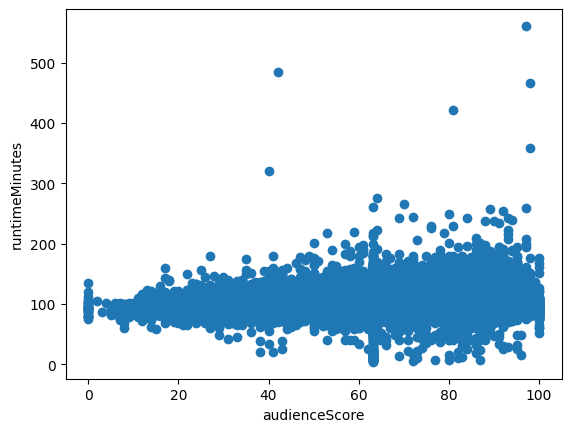

In [28]:
plt.scatter(merged_df['audienceScore'], merged_df['runtimeMinutes'])
plt.xlabel('audienceScore')
plt.ylabel('runtimeMinutes')
plt.show()

In [29]:
'''merged_df[['audienceScore', 'runtimeMinutes']].hist()
plt.show()
'''

"merged_df[['audienceScore', 'runtimeMinutes']].hist()\nplt.show()\n"

In [30]:
'''import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for numerical columns
sns.boxplot(data=merged_df[['audienceScore', 'runtimeMinutes']])
plt.show()
'''

"import seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Create box plots for numerical columns\nsns.boxplot(data=merged_df[['audienceScore', 'runtimeMinutes']])\nplt.show()\n"

Notice, minimum and maximum of audience score and runtime aren't on the same scale. So we use standard scaling.

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

merged_df[numerical_columns] = scaler.fit_transform(merged_df[numerical_columns])

In [32]:
merged_df.describe()

,audienceScore,runtimeMinutes
count,1.681200e+04,1.681200e+04
mean,-3.169802e-16,2.003315e-16
std,1.000030e+00,1.000030e+00
min,-3.244182e+00,-4.628977e+00
25%,-6.767710e-01,-5.639211e-01
50%,-3.648511e-16,-9.124010e-02
75%,7.609792e-01,3.814409e-01
max,1.890640e+00,2.169935e+01


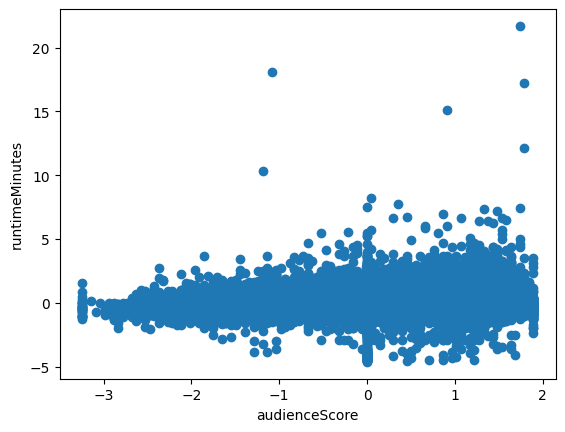

In [33]:
plt.scatter(merged_df['audienceScore'], merged_df['runtimeMinutes'])
plt.xlabel('audienceScore')
plt.ylabel('runtimeMinutes')
plt.show()


In [34]:
'''merged_df[['audienceScore', 'runtimeMinutes']].hist()
plt.show()
'''

"merged_df[['audienceScore', 'runtimeMinutes']].hist()\nplt.show()\n"

In [35]:
'''import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for numerical columns
sns.boxplot(data=merged_df[['audienceScore', 'runtimeMinutes']])
plt.show()
'''

"import seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Create box plots for numerical columns\nsns.boxplot(data=merged_df[['audienceScore', 'runtimeMinutes']])\nplt.show()\n"

In [36]:
merged_df.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,9.345232e-02,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,0.145100,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,$1.1M,Netflix,Surround
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,Tony Montana Frodo Baggins V Rocky Balboa,-3.648511e-16,R,['Language'],2018-09-14,2013-01-08,-0.516653,Action,English,Alma White,$1.1M,Paramount Pictures,Surround
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE,Darth Vader Katniss Everdeen Sorcerer Donnie D...,8.636756e-01,PG-13,"['Language', 'A Scene of Sensuality', 'Sports ...",2018-11-21,2019-02-12,1.326803,Drama,English,Bobby Oleary,$115.7M,"Warner Bros. Pictures, Metro-Goldwyn-Mayer",Surround
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE,Lara Croft Glimmer,-3.648511e-16,R,['Language'],2018-09-14,2020-06-02,-4.109028,Drama,Spanish,Eric Hutcherson,$1.1M,Paramount Pictures,Surround
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE,Jason Bourne Surreal The Terminator Indiana Jones,1.736595e+00,R,"['Language', 'Drug Content', 'Sexuality', 'Str...",2003-01-17,2004-06-08,1.374071,"Crime, Drama",Portuguese (Brazil),John Trent,$7.6M,Miramax Films,"Surround, Dolby SR, Dolby Digital, Dolby A, Do..."


###Corpus Cleaning Begins

In [37]:
merged_df['reviewText'][1500]

'A riveting and quirky movie about the aftershocks of 9/11 in the lives of a group of people still in denial a year later.'

In [90]:

def expand_contractions(text):
    # Implement your own function to expand contractions here
    # Example implementation using a contraction mapping dictionary:
    contraction_mapping = {
        "ain't": "am not",
        "aren't": "are not",
        "can't": "cannot",
        "could've": "could have",
        "aren’t" : "are not" ,
        "there’s": "there is" ,
        "can’t" : "can not" ,
        "they’d" : "they had",
        "couldn’t" : "could not" ,
        "they’ll" : "they will",
        "didn’t" : "did not" ,
        "they’re" : "they are",
        "doesn’t" : "does not" ,
        "they’ve" : "they have",
        "don’t" : "do not" ,
        "we’d" : "we had",
        "hadn’t" : "had not" ,
        "we’re" : "we are",
        "hasn’t" : "has not" ,
        "we’ve" : "we have",
        "haven’t" : "have not" ,
        "weren’t" : "were not",
        "he’d" : "he had",
        "what’ll" : "what will",
        "he’ll" : "he will",
        "what’re" : "what are",
        "he’s" : "he is",
        "what’s" : "what is",
        "I’d" : "I had",
        "what’ve" : "what have",
        "I’ll" : "I will",
        "where’s" : "where is",
        "I’m" : "I am" ,
        "who’d" : "who had",
        "I’ve" : "I have" ,
        "who’ll" : "who will",
        "isn’t" : "is not" ,
        "who’re" : "who are",
        "let’s" : "let us" ,
        "who’s" : "who is",
        "mightn’t" : "might not" ,
        "who’ve" : "who have",
        "mustn’t" : "must not" ,
        "won’t" : "will not",
        "shan’t" : "shall not" ,
        "wouldn’t" : "would not",
        "she’d" : "she had",
        "you’d" : "you had",
        "she’ll" : "she will",
        "you’ll" : "you will",
        "she’s" : "she is",
        "you’re" : "you are",
        "shouldn’t" : "should not",
        "you’ve" : "you have",
        "that’s" : "that is",
    }
    for contraction, expansion in contraction_mapping.items():
        text = text.replace(contraction, expansion)
    return text

def eliminate_apostrophes(text):
    # Remove apostrophes
    text = text.replace("'", "")
    return text

def eliminate_numbers(text):
    # Remove numbers
    text = re.sub(r"\d+", "", text)
    return text

def eliminate_special_characters(text):
    # Remove special characters and punctuation (excluding apostrophes)
    special_characters = string.punctuation.replace("'", "")
    text = re.sub(rf"[{re.escape(special_characters)}]", "", text)
    return text

def remove_stopwords(text):
    # Remove stopwords from text
    stop_words = set(ENGLISH_STOP_WORDS)
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    text = " ".join(filtered_words)
    return text

# Define a function to preprocess the text

def preprocess_text(text):
    # Step 1: Expand Contractions
    text = expand_contractions(text)

    # Step 2: Eliminate Apostrophes
    text = eliminate_apostrophes(text)

    # Step 3: Eliminate Numbers
    text = eliminate_numbers(text)

    # Step 4: Eliminate Special Characters
    text = eliminate_special_characters(text)

    # Step 5: Lowercasing
    text = text.lower()

    # Step 6: Tokenization (optional, depending on subsequent steps)
    # Skip tokenization for now

    # Step 7: Stopword Removal
    text = remove_stopwords(text)

    return text

# Apply the preprocessing function to the 'reviewText' column in 'merged_df'

cleaned_text = merged_df.copy()
cleaned_text['reviewText'] = merged_df['reviewText'].apply(preprocess_text)

# Now, 'merged_df' contains the preprocessed text data
  # If you want to keep the original DataFrame
cleaned_text.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,292,0,henry selick’s movie ’s coraline fifth stopmot...,POSITIVE,Marvelous Pirate,9.345232e-02,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,0.145100,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,$1.1M,Netflix,344
1,tony_montana_frodo_baggins_v_rocky_balboa,962,0,cast reads like vogue oscar party guest list v...,NEGATIVE,Tony Montana Frodo Baggins V Rocky Balboa,-3.648511e-16,R,['Language'],2018-09-14,2013-01-08,-0.516653,Action,English,Alma White,$1.1M,Paramount Pictures,344
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,1972,1,creed ii does slightly superior rocky sequel w...,POSITIVE,Darth Vader Katniss Everdeen Sorcerer Donnie D...,8.636756e-01,PG-13,"['Language', 'A Scene of Sensuality', 'Sports ...",2018-11-21,2019-02-12,1.326803,Drama,English,Bobby Oleary,$115.7M,"Warner Bros. Pictures, Metro-Goldwyn-Mayer",344
3,lara_croft_glimmer,2299,0,know youre thinking limitless bradley cooper c...,POSITIVE,Lara Croft Glimmer,-3.648511e-16,R,['Language'],2018-09-14,2020-06-02,-4.109028,Drama,Spanish,Eric Hutcherson,$1.1M,Paramount Pictures,344
4,jason_bourne_surreal_the_terminator_indiana_jones,63,0,director fernando meirelles tells story urgenc...,POSITIVE,Jason Bourne Surreal The Terminator Indiana Jones,1.736595e+00,R,"['Language', 'Drug Content', 'Sexuality', 'Str...",2003-01-17,2004-06-08,1.374071,"Crime, Drama",Portuguese (Brazil),John Trent,$7.6M,Miramax Films,386


#####How much of a cleaned up did we do? (An Example)

In [40]:
merged_df['reviewText'][100]

"Look, it's easy to laugh at this stuff - that's part of the game, in fact. To buy into these movies, you have to buy into the silliness. But The Longest Ride, for all its ridiculousness, comes by its emotions honestly."

In [41]:
cleaned_text['reviewText'][100]

'look easy laugh stuff thats game fact buy movies buy silliness longest ride ridiculousness comes emotions honestly'

####How much of a clean up did we do? (Words Droppage)


In [42]:
all_uncleaned_words = []
for t in merged_df['reviewText']:
    if isinstance(t, str):  # Check if the value is a non-null string
        all_uncleaned_words.extend(t.split())

print("All Uncleaned Words:\n\n", all_uncleaned_words[:50])
print("\n\nTotal Number of Words Before Cleaning:", len(all_uncleaned_words))

All Uncleaned Words:

 ['Henry', 'Selick’s', 'first', 'movie', 'since', '2009’s', 'Coraline.', 'His', 'fifth', 'stop-motion', 'masterpiece.', 'With', 'a', 'cast', 'that', 'reads', 'like', 'the', 'Vogue', 'Oscar', 'party', 'guest', 'list,', "Valentine's", 'Day', 'should', 'have', 'been', "can't-miss", 'cinema', 'instead', 'of', 'standard', 'Hollywood', 'schmaltz.', 'Creed', 'II', 'does', 'not', 'give', 'us', 'anything', 'but', 'another,', 'slightly', 'superior', 'Rocky', 'sequel.', 'It', 'wins']


Total Number of Words Before Cleaning: 336801


In [43]:
all_cleaned_words = []
for t in cleaned_text['reviewText']:
    if isinstance(t, str):  # Check if the value is a non-null string
        all_cleaned_words.extend(t.split())

print("All Uncleaned Words:\n\n",all_cleaned_words[:50])
print("\n\nTotal Number of Words After Cleaning:",len(all_cleaned_words))

All Uncleaned Words:

 ['henry', 'selick’s', 'movie', '’s', 'coraline', 'fifth', 'stopmotion', 'masterpiece', 'cast', 'reads', 'like', 'vogue', 'oscar', 'party', 'guest', 'list', 'valentines', 'day', 'cantmiss', 'cinema', 'instead', 'standard', 'hollywood', 'schmaltz', 'creed', 'ii', 'does', 'slightly', 'superior', 'rocky', 'sequel', 'wins', 'points', 'just', 'dont', 'expect', 'knockout', 'know', 'youre', 'thinking', 'limitless', 'bradley', 'cooper', 'cells', 'multiply', 'lucy', 'taps', 'brain', 'new', 'thrillsnew']


Total Number of Words After Cleaning: 175523


Observation: The number of words dropped from 336k to 175k. Which is a significant drop.

\\

####Why are we bothered about this number?

Size of vocab will determine the size of features. We know, that each word of the vocab can be considered as a feature.

This vocab of 175k words will be used to make the corpus structured.

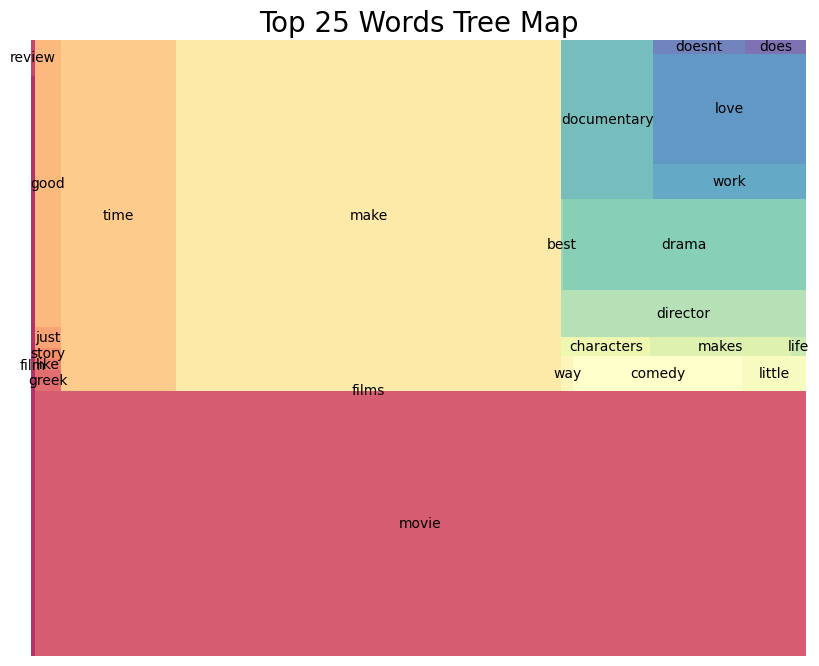

In [44]:
import squarify
from collections import Counter

word_counts = Counter(all_cleaned_words)

words = list(word_counts.keys())
frequencies = list(word_counts.values())

sorted_words = [x for _, x in sorted(zip(frequencies, words), reverse=True)]

#print(sorted_words[:25])
#print(len(sorted_words))


top_25_words = sorted_words[:25]
top_frequencies = frequencies[:25]

# Get data
labels = top_25_words
sizes = top_frequencies

# Set color palette
colors = plt.cm.Spectral(np.linspace(0, 1, len(labels)))

# Draw tree map
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Customize plot
plt.title('Top 25 Words Tree Map', fontsize=20)
plt.axis('off')
plt.gcf().set_size_inches(10, 8)

plt.show()

Let's look at the word clouds of the positive and negative reviews. We want to see what are most prevailing words in either classes.

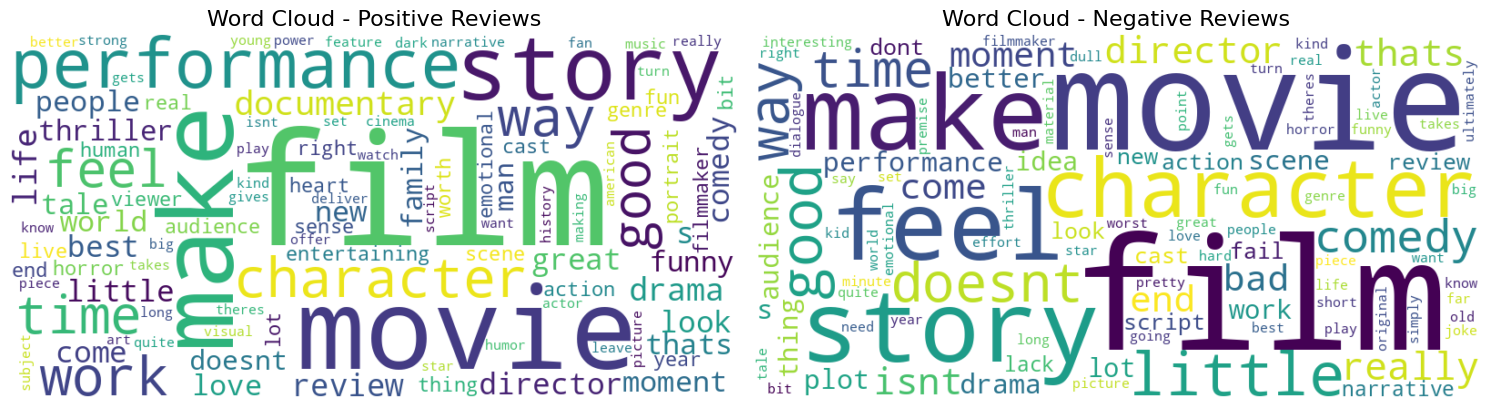

In [45]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Adjust the parameters for word cloud appearance
wordcloud_params = {
    'width': 800,
    'height': 400,
    'background_color': 'white',
    'colormap': 'viridis',  # Choose a colormap for coloring the words
    'max_words': 100,       # Limit the number of words displayed
    'contour_width': 1,     # Add a contour around words
    'contour_color': 'steelblue',  # Color of the contour
}

cleaned_text['sentiment'] = cleaned_text['sentiment'].str.lower()

negative_reviews = cleaned_text[cleaned_text['sentiment'] == 'negative']
positive_reviews = cleaned_text[cleaned_text['sentiment'] == 'positive']

# Concatenate the text of positive reviews into a single string
positive_text = "".join(positive_reviews['reviewText'])

# Concatenate the text of negative reviews into a single string
negative_text = "".join(negative_reviews['reviewText'])

# Create a WordCloud object for positive reviews
wordcloud_positive = WordCloud(**wordcloud_params).generate(positive_text)

# Create a WordCloud object for negative reviews
wordcloud_negative = WordCloud(**wordcloud_params).generate(negative_text)

# Create subplots to display both word clouds side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Plot the word cloud for positive reviews
axes[0].imshow(wordcloud_positive, interpolation='bilinear')
axes[0].set_title('Word Cloud - Positive Reviews', fontsize=16)
axes[0].axis('off')

# Plot the word cloud for negative reviews
axes[1].imshow(wordcloud_negative, interpolation='bilinear')
axes[1].set_title('Word Cloud - Negative Reviews', fontsize=16)
axes[1].axis('off')

# Adjust layout to avoid overlapping titles
plt.tight_layout()
plt.show()

We notice, that in either of the classes, there are fews domain specific words that are most prevailing. Which is making it hard to infer about positive or negative reviews.

We want to remove these domain specific stop words too.

######Collect list of domain specific stop words

In [46]:
domain_stop_words = set([
    'movie', 'film', 'movies', 'films', 'actor', 'actress', 'directed',
    'director', 'cinema', 'scene', 'scenes', 'screenplay', 'screen',
    'story', 'plot', 'character', 'characters', 'role', 'roles', 'act',
    'acting', 'genre', 'genres', 'hollywood', 'review', 'reviews',
    'critic', 'critics', 'award', 'awards', 'best', 'worst', 'good',
    'bad', 'great', 'poor', 'entertainment', 'script', 'director',
    'oscar', 'nominated', 'performance', 'screen', 'theater', 'scene',
    'scenes', 'sequel', 'cast', 'production', 'hollywood', 'festival',
    'watched', 'watching', 'viewer', 'audience', 'screening', 'release',
    'released', 'premiere', 'premiered', 'entertaining', 'entertainment',
    'starring', 'camera', 'viewer', 'plotline', 'box office', 'soundtrack',
    'sound', 'musical', 'musicals', 'cinematography', 'flop', 'hit',
    'adaptation', 'adapted', 'blockbuster', 'villain', 'hero', 'heroine',
    'narrative', 'dialogue', 'filmmaker', 'filmmaking', 'award-winning',
    'storyline', 'genre', 'cinematic', 'screenwriter', 'scriptwriter',
    'backdrop', 'motion picture', 'silver screen', 'on-screen', 'big screen',
    'in theaters', 'oscar-worthy', "viewer's choice", 'screen presence',
    'picture', 'opening credits', 'closing credits', 'coming attraction',
    "director's cut", 'filmography', 'leading role', 'supporting role',
    'motion picture industry', 'box office hit', 'cult film', 'mainstream',
    'cinematic experience', 'leading man', 'leading lady', 'independent film',
    'documentary', 'animated film', 'on location', 'voice-over', 'animation',
    'film industry', 'motion picture', 'scene-stealer', 'plot twist',
    'suspense', 'cinematic masterpiece', 'moviegoer', 'scene-chewing',
    'viewer discretion', 'sound effects', 'in production', 'post-production',
    'film festival', 'motion picture studio', 'filming locations',
    'production crew', 'directorial debut', 'motion picture soundtrack',
    'cinematographic', 'costume design', 'movie magic', 'directorial vision',
    'film buff', 'on-screen chemistry', 'casting call', 'cinematic history',
    'film critic', 'camera angle', 'motion picture director', 'on-screen love',
    'film noir', 'scene direction', 'camera operator', 'screenplay writer',
    'big screen debut', 'film industry insider', 'film lover', 'motion picture'
])


######Collect list of common adjectives

In [47]:
adjectives = [
    "attractive", "bald", "beautiful", "chubby", "clean", "dazzling", "drab",
    "elegant", "fancy", "fit", "flabby", "glamorous", "gorgeous", "handsome",
    "long", "magnificent", "muscular", "plain", "plump", "quaint", "scruffy",
    "shapely", "short", "skinny", "stocky", "ugly", "unkempt", "unsightly",
    "alive", "better", "careful", "clever", "dead", "easy", "famous", "gifted",
    "hallowed", "helpful", "important", "inexpensive", "mealy", "mushy", "odd",
    "poor", "powerful", "rich", "shy", "tender", "unimportant", "uninterested",
    "vast", "wrong", "aggressive", "agreeable", "ambitious", "brave", "calm",
    "delightful", "eager", "faithful", "gentle", "happy", "jolly", "kind",
    "lively", "nice", "obedient", "polite", "proud", "silly", "thankful",
    "victorious", "witty", "wonderful", "zealous",
    "angry", "bewildered", "clumsy", "defeated", "embarrassed", "fierce", "grumpy",
    "helpless", "itchy", "jealous", "lazy", "mysterious", "nervous", "obnoxious",
    "panicky", "pitiful", "repulsive", "scary", "thoughtless", "uptight", "worried",
    "broad", "crooked", "curved", "deep", "flat", "high", "hollow", "low",
    "narrow", "refined", "round", "shallow", "square", "steep", "straight",
    "wide",
    "big", "colossal", "fat", "gigantic", "great", "huge", "immense", "large",
    "little", "mammoth", "massive", "microscopic", "miniature", "petite", "puny",
    "scrawny", "short", "small", "tall", "teeny", "tiny",
    "crashing", "deafening", "echoing", "faint", "harsh", "hissing", "howling",
    "loud", "melodic", "noisy", "purring", "quiet", "rapping", "raspy",
    "rhythmic", "screeching", "shrilling", "squeaking", "thundering", "tinkling",
    "wailing", "whining", "whispering",
    "ancient", "brief", "early", "fast", "future", "late", "long", "modern",
    "old", "old-fashioned", "prehistoric", "quick", "rapid", "short", "slow",
    "swift", "young",
    "acidic", "bitter", "cool", "creamy", "delicious", "disgusting", "fresh",
    "greasy", "juicy", "hot", "moldy", "nutritious", "nutty", "putrid", "rancid",
    "ripe", "rotten", "salty", "savory", "sour", "spicy", "spoiled", "stale",
    "sweet", "tangy", "tart", "tasteless", "tasty", "yummy",
    "breezy", "bumpy", "chilly", "cold", "cool", "cuddly", "damaged", "damp",
    "dirty", "dry", "flaky", "fluffy", "freezing", "greasy", "hot", "icy",
    "loose", "melted", "prickly", "rough", "shaggy", "sharp", "slimy", "sticky",
    "strong", "tight", "uneven", "warm", "weak", "wet", "wooden",
    "abundant", "billions", "enough", "few", "full", "hundreds", "incalculable",
    "limited", "little", "many", "most", "millions", "numerous", "scarce",
    "some", "sparse", "substantial", "thousands",]


######Positive word cloud

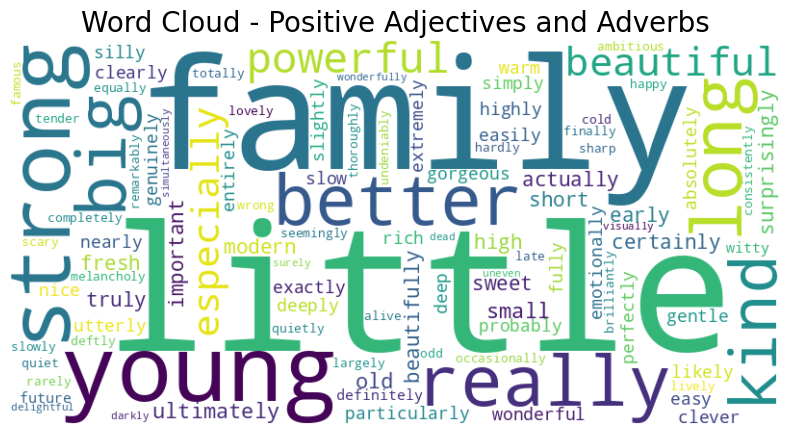

In [48]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string

# Define your list of stopwords

# Helper function to check if a word is an adjective or adverb
def is_adjective_or_adverb(word):
    return word.endswith("ly") or word in adjectives

# List of common adjectives

# Tokenize and remove stopwords for positive reviews
positive_tokens = positive_text.lower().split()
filtered_positive_tokens = [word for word in positive_tokens if word not in domain_stop_words]

# Select adjectives and adverbs
adjectives_and_adverbs_positive = [word for word in filtered_positive_tokens if is_adjective_or_adverb(word)]

# Reconstruct filtered text
filtered_adjectives_and_adverbs_positive_text = " ".join(adjectives_and_adverbs_positive)

# Create WordCloud object for adjectives and adverbs in positive reviews
wordcloud_adjectives_and_adverbs_positive = WordCloud(**wordcloud_params).generate(filtered_adjectives_and_adverbs_positive_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_adjectives_and_adverbs_positive, interpolation='bilinear')
plt.title('Word Cloud - Positive Adjectives and Adverbs', fontsize=20)
plt.axis('off')
plt.show()


######Negative Word Cloud

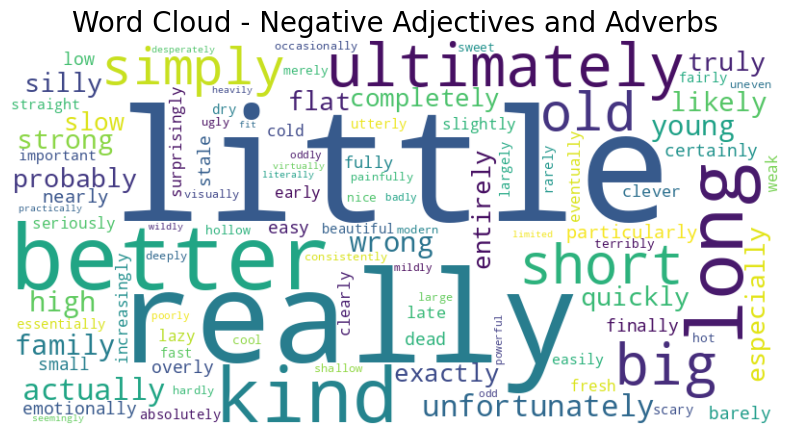

In [49]:
from numpy.ma.core import negative
negative_tokens = negative_text.lower().split()
filtered_negative_tokens = [word for word in negative_tokens if word not in domain_stop_words]

# Select adjectives and adverbs
adjectives_and_adverbs_negative = [word for word in filtered_negative_tokens if is_adjective_or_adverb(word)]

# Reconstruct filtered text
filtered_adjectives_and_adverbs_negative_text = " ".join(adjectives_and_adverbs_negative)

# Create WordCloud object for adjectives and adverbs in positive reviews
wordcloud_adjectives_and_adverbs_negative = WordCloud(**wordcloud_params).generate(filtered_adjectives_and_adverbs_negative_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_adjectives_and_adverbs_negative, interpolation='bilinear')
plt.title('Word Cloud - Negative Adjectives and Adverbs', fontsize=20)
plt.axis('off')
plt.show()

####Check For Data Imbalance

In [50]:
import seaborn as sns

sentiment_counts = cleaned_text['sentiment'].value_counts()

sentiment_counts


positive    11160
negative     5652
Name: sentiment, dtype: int64

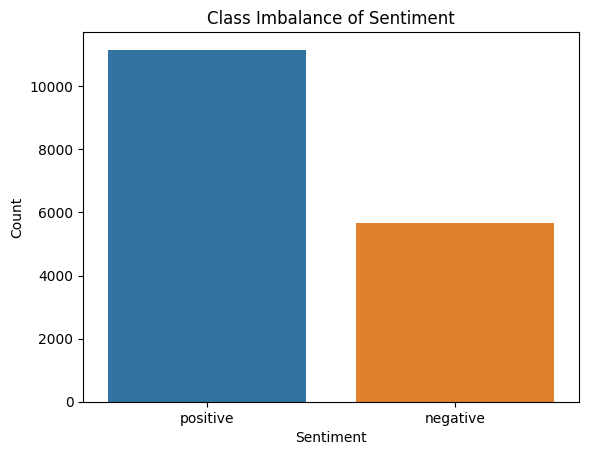

In [51]:
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Class Imbalance of Sentiment')

# Show the plot
plt.show()

As we can see, the negative reviews are nearly half the number of positive reviews. This amount of imbalance is tolerable.

In [87]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'color' column
encoded_color = label_encoder.fit_transform(categorical_columns)

# Now, 'encoded_color' contains the numerical labels
print(encoded_color)


[5 4 2 3 0 1 6]


###Explore Other Columns

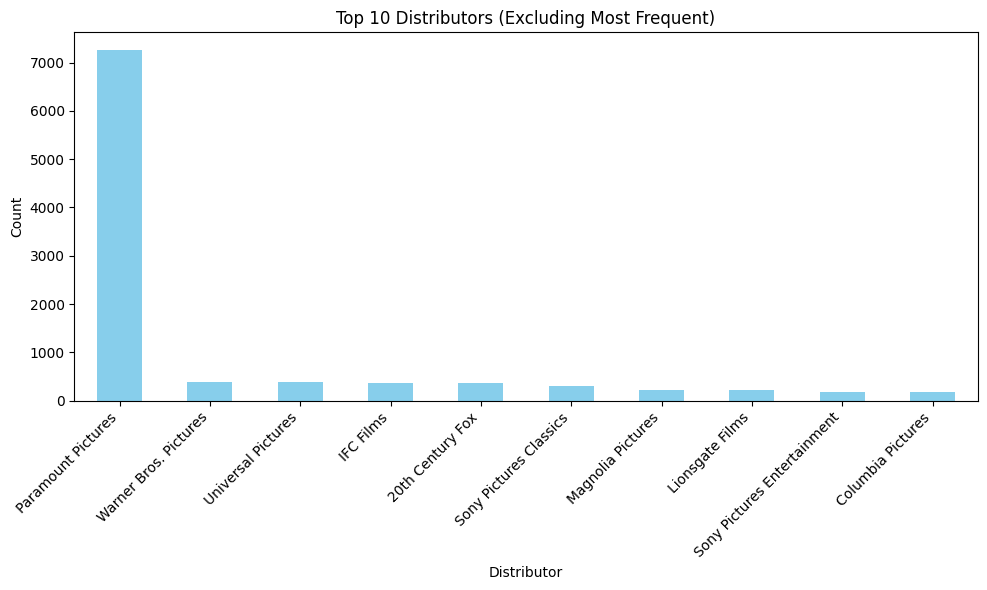

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your data loaded in a DataFrame called 'merged_df'

# Count the occurrences of each distributor and sort them in descending order
distributor_counts = merged_df['distributor'].value_counts()

# Set the number of top categories you want to plot (e.g., top 10)
top_n = 10

top_distributors = distributor_counts.head(top_n)

# Exclude the most frequent distributor
#top_distributors = distributor_counts.iloc[1:(top_n+1)]

# Create a bar plot
plt.figure(figsize=(10, 6))
top_distributors.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title(f'Top {top_n} Distributors (Excluding Most Frequent)')
plt.xlabel('Distributor')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


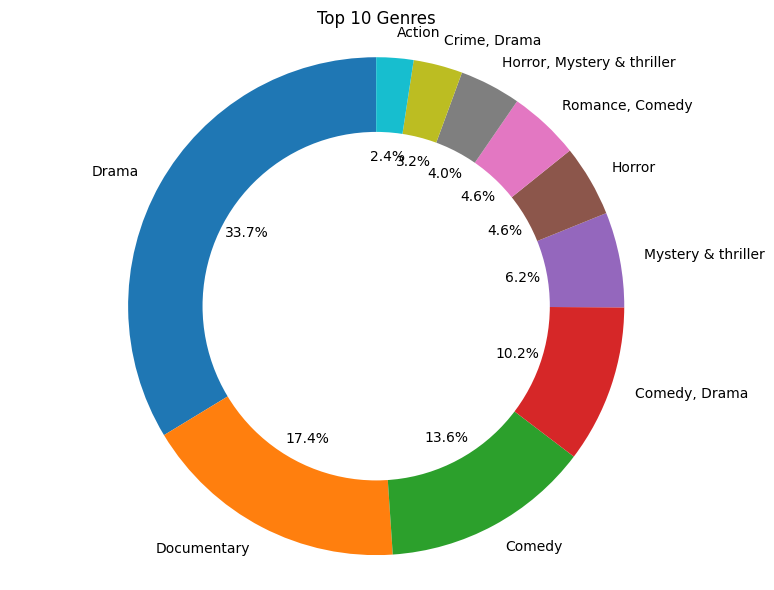

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your data loaded in a DataFrame called 'merged_df'

# Count the occurrences of each genre and sort them in descending order
genre_counts = merged_df['genre'].value_counts()

# Set the number of top genres you want to plot (e.g., top 10)
top_n = 10

# Create a figure with two subplots: one for the pie chart and one for the text label
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the pie chart
ax.pie(genre_counts.head(top_n), labels=genre_counts.index[:top_n], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))

# Draw a circle at the center to make it a donut chart
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

# Customize the plot
plt.title(f'Top {top_n} Genres')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the plot
plt.tight_layout()
plt.show()


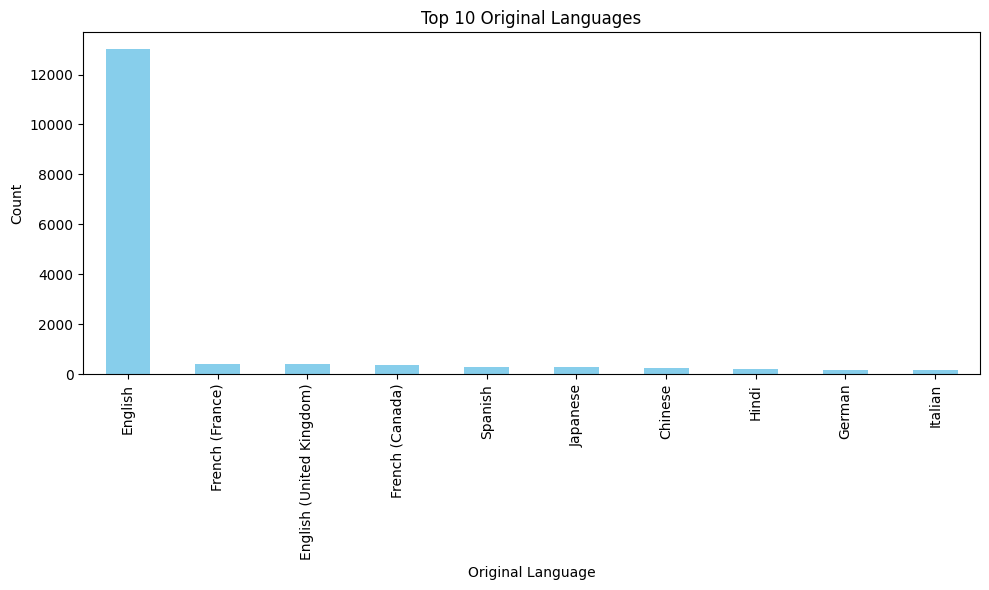

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your data loaded in a DataFrame called 'merged_df'

# Count the occurrences of each original language and sort them in descending order
language_counts = merged_df['originalLanguage'].value_counts()

# Set the number of top languages you want to plot (e.g., top 10)
top_n = 10

# Create a bar plot for the top languages
plt.figure(figsize=(10, 6))
language_counts.head(top_n).plot(kind='bar', color='skyblue')

# Customize the plot
plt.title(f'Top {top_n} Original Languages')
plt.xlabel('Original Language')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


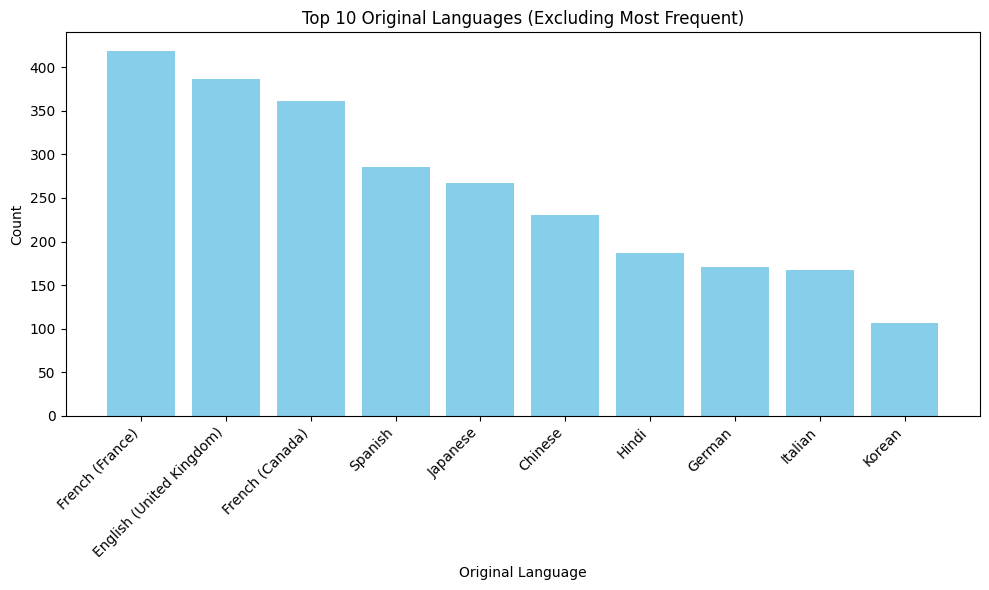

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your data loaded in a DataFrame called 'merged_df'

# Count the occurrences of each original language and sort them in descending order
language_counts = merged_df['originalLanguage'].value_counts()

# Set the number of top languages you want to plot excluding the most frequent one (e.g., top 11)
top_n = 11

# Exclude the most frequent language
top_languages = language_counts.index[1:top_n]
top_language_counts = language_counts.values[1:top_n]

# Create a bar plot for the top languages
plt.figure(figsize=(10, 6))
plt.bar(top_languages, top_language_counts, color='skyblue')

# Customize the plot
plt.title(f'Top {top_n - 1} Original Languages (Excluding Most Frequent)')
plt.xlabel('Original Language')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


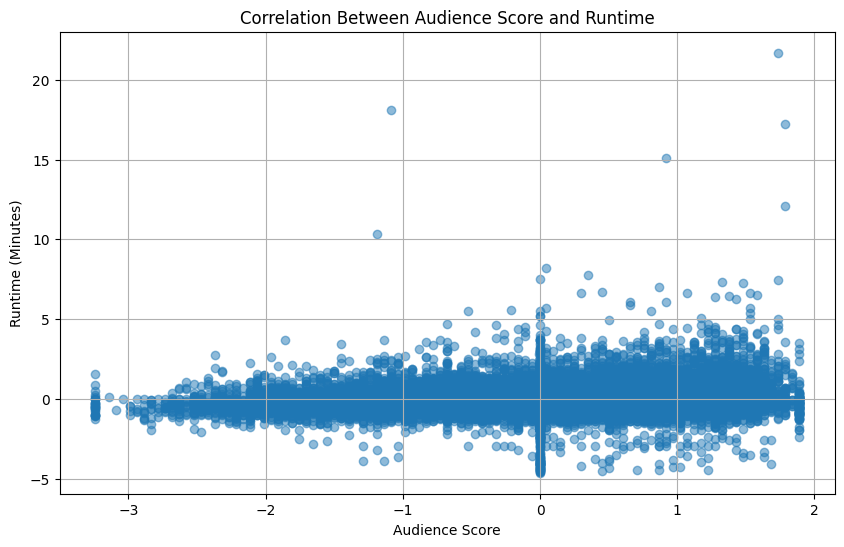

In [85]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'cleaned_text'
x = cleaned_text['audienceScore']
y = cleaned_text['runtimeMinutes']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Audience Score')
plt.ylabel('Runtime (Minutes)')
plt.title('Correlation Between Audience Score and Runtime')
plt.grid(True)

# Show the plot
plt.show()


##Data Extraction

####Take 6 top/important features from movie and all features from train..
####Then train logreg with tuned hyperparameters using gridsearchCV.




I used a few methods to know which features are important

1. Chi square and independent samples t-test for categorical and numerical features respectively
2. Univariable analysis - Run a simple logistic regression model (or decision tree) for each feature individually and check if it does better than dummy. Esp observe confusion matrix, not just the score.
3. RFE - Run it on features from movies data
4. Selectkbest
5. Incrementally add features one by one to review text - choosing the order of introduction of features based on previous analysis
6. Build a full model with all available features and remove features one by one

In [91]:
import scipy.stats as stats

# Assuming you have a movies DataFrame with 'genre' and 'rating' columns
contingency_table = pd.crosstab(cleaned_text['genre'], cleaned_text['rating'])

# Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)

Chi-square statistic: 16432.608770291903
P-value: 0.0
Degrees of freedom: 6966


In [55]:
'''
# Example using scikit-learn's SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df['categorical_column'] = imputer.fit_transform(df[['categorical_column']])

'''

"\n# Example using scikit-learn's SimpleImputer\nfrom sklearn.impute import SimpleImputer\n\nimputer = SimpleImputer(strategy='most_frequent')\ndf['categorical_column'] = imputer.fit_transform(df[['categorical_column']])\n\n"

In [56]:
'''from sklearn.feature_selection import SelectKBest, f_classif

# Assuming your merged dataset is stored in a DataFrame called 'merged_data'
X = merged_df[[	'reviewerName',	'isFrequentReviewer',
               'reviewText',	'title',	'audienceScore',	'rating',
               'ratingContents',	'releaseDateTheaters',
               'releaseDateStreaming',	'runtimeMinutes',	'genre',
               'originalLanguage',	'director',	'boxOffice',	'distributor','soundType']]

y = merged_df['sentiment']

k_best = SelectKBest(score_func=f_classif, k=6)

selected_features = k_best.fit_transform(X, y)
''';

In [57]:
from sklearn.preprocessing import OneHotEncoder

# Assuming 'categorical_column' is a list of categorical column names
encoder = OneHotEncoder(sparse=False, drop='first')
categorical_encoded = encoder.fit_transform(merged_df[categorical_columns])

# Assuming 'numerical_features' is a list of numerical column names
numerical_data = merged_df[numerical_columns]

# Concatenate numerical and one-hot encoded categorical features
features = pd.concat([numerical_data, pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_columns))], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [58]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'isFrequentReviewer' column
merged_df['isFrequentReviewer'] = label_encoder.fit_transform(merged_df['isFrequentReviewer'])

merged_df['reviewerName'] = label_encoder.fit_transform(merged_df['reviewerName'])

merged_df['soundType'] = label_encoder.fit_transform(merged_df['soundType'])

merged_df.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,292,0,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,9.345232e-02,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,0.145100,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,$1.1M,Netflix,344
1,tony_montana_frodo_baggins_v_rocky_balboa,962,0,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,Tony Montana Frodo Baggins V Rocky Balboa,-3.648511e-16,R,['Language'],2018-09-14,2013-01-08,-0.516653,Action,English,Alma White,$1.1M,Paramount Pictures,344
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,1972,1,Creed II does not give us anything but another...,POSITIVE,Darth Vader Katniss Everdeen Sorcerer Donnie D...,8.636756e-01,PG-13,"['Language', 'A Scene of Sensuality', 'Sports ...",2018-11-21,2019-02-12,1.326803,Drama,English,Bobby Oleary,$115.7M,"Warner Bros. Pictures, Metro-Goldwyn-Mayer",344
3,lara_croft_glimmer,2299,0,"I know what you're thinking, but this is no Li...",POSITIVE,Lara Croft Glimmer,-3.648511e-16,R,['Language'],2018-09-14,2020-06-02,-4.109028,Drama,Spanish,Eric Hutcherson,$1.1M,Paramount Pictures,344
4,jason_bourne_surreal_the_terminator_indiana_jones,63,0,Director Fernando Meirelles tells the story wi...,POSITIVE,Jason Bourne Surreal The Terminator Indiana Jones,1.736595e+00,R,"['Language', 'Drug Content', 'Sexuality', 'Str...",2003-01-17,2004-06-08,1.374071,"Crime, Drama",Portuguese (Brazil),John Trent,$7.6M,Miramax Films,386


In [59]:
merged_df['isFrequentReviewer'] = merged_df['isFrequentReviewer'].replace([True, False], [1,0])
merged_df.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,292,0,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,9.345232e-02,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,0.145100,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,$1.1M,Netflix,344
1,tony_montana_frodo_baggins_v_rocky_balboa,962,0,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,Tony Montana Frodo Baggins V Rocky Balboa,-3.648511e-16,R,['Language'],2018-09-14,2013-01-08,-0.516653,Action,English,Alma White,$1.1M,Paramount Pictures,344
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,1972,1,Creed II does not give us anything but another...,POSITIVE,Darth Vader Katniss Everdeen Sorcerer Donnie D...,8.636756e-01,PG-13,"['Language', 'A Scene of Sensuality', 'Sports ...",2018-11-21,2019-02-12,1.326803,Drama,English,Bobby Oleary,$115.7M,"Warner Bros. Pictures, Metro-Goldwyn-Mayer",344
3,lara_croft_glimmer,2299,0,"I know what you're thinking, but this is no Li...",POSITIVE,Lara Croft Glimmer,-3.648511e-16,R,['Language'],2018-09-14,2020-06-02,-4.109028,Drama,Spanish,Eric Hutcherson,$1.1M,Paramount Pictures,344
4,jason_bourne_surreal_the_terminator_indiana_jones,63,0,Director Fernando Meirelles tells the story wi...,POSITIVE,Jason Bourne Surreal The Terminator Indiana Jones,1.736595e+00,R,"['Language', 'Drug Content', 'Sexuality', 'Str...",2003-01-17,2004-06-08,1.374071,"Crime, Drama",Portuguese (Brazil),John Trent,$7.6M,Miramax Films,386


In [60]:
'''from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
onehot_encoder = OneHotEncoder(sparse=False, drop='first')

# Fit and transform the categorical columns
encoded_columns = onehot_encoder.fit_transform(merged_df[categorical_columns])

# Get the feature names for the encoded columns
feature_names = onehot_encoder.get_feature_names_out(input_features=categorical_columns)

# Create a DataFrame from the encoded columns with the correct feature names
encoded_df = pd.DataFrame(encoded_columns, columns=feature_names)

# Replace the original columns with the encoded columns in your merged_df
merged_df = pd.concat([merged_df.drop(categorical_columns, axis=1), encoded_df], axis=1)
'''

"from sklearn.preprocessing import OneHotEncoder\n\n# Create a OneHotEncoder object\nonehot_encoder = OneHotEncoder(sparse=False, drop='first')\n\n# Fit and transform the categorical columns\nencoded_columns = onehot_encoder.fit_transform(merged_df[categorical_columns])\n\n# Get the feature names for the encoded columns\nfeature_names = onehot_encoder.get_feature_names_out(input_features=categorical_columns)\n\n# Create a DataFrame from the encoded columns with the correct feature names\nencoded_df = pd.DataFrame(encoded_columns, columns=feature_names)\n\n# Replace the original columns with the encoded columns in your merged_df\nmerged_df = pd.concat([merged_df.drop(categorical_columns, axis=1), encoded_df], axis=1)\n"

##This is how submission csv should look like

In [61]:
sample = pd.read_csv('/content/sample.csv')

In [62]:
sample.head()

,id,sentiment
0,0,NEGATIVE
1,1,NEGATIVE
2,2,NEGATIVE
3,3,NEGATIVE
4,4,NEGATIVE


##This is submission is to be made

In [63]:
'''submission = pd.DataFrame(columns = ['sentiment'])
################################submission['movieid'] = train.loc[:, "movieid"]
submission['sentiment'] = prediction
submission.to_csv('submission.csv', index_label = 'id')'''

'submission = pd.DataFrame(columns = [\'sentiment\'])\n################################submission[\'movieid\'] = train.loc[:, "movieid"]\nsubmission[\'sentiment\'] = prediction\nsubmission.to_csv(\'submission.csv\', index_label = \'id\')'

In [64]:
'''submission'''

'submission'